ابتدا کتابخانه های مورد نیاز را لود میکنیم. علاوه بر کتاب خانه های بیش فرض دو کتاب خانه رندوم و تقدم نیز استفاده شده اند.

In [2]:
from torchvision import datasets as dt
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm
import random

# **Q3:**

## Dataset

دیتاست mnist
<br>
را لود میکنیم. درضورت عدم وجود دیتابیس در سیستم آن را دانلود میکنیم

In [3]:
# load the training data
mnist = dt.MNIST('data', train=True, download=True)
mnist = list(mnist)[:2500]

نه عکس ابتدایی دیتاست را ترسیم میکنیم. اینکار به ما کمک میکند تا مطمپن شویم که دیتاست درست دانلود شده است.

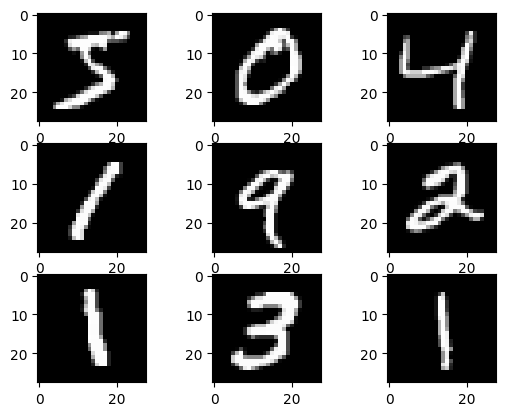

In [4]:
# plot the first 12 images in the training data
import matplotlib.pyplot as plt
for k, (image, label) in enumerate(mnist[:9]):
  plt.subplot(3, 3, k+1)
  plt.imshow(image, cmap='gray')

یک مبدل تعریف می کنیم. این مبدل ساده ترین مبدل ممکن است که تصاویر را به تنسور های قابل پردازش برای تورچ تبدیل می کند.

In [5]:
# transform the image data type to tensor
img_to_tensor = transforms.ToTensor()

مبدل را تست می کنیم تا از کارکرد صحیح ان مطمین شویم

In [6]:
# convert the last image we saw into a tensor
img_tensor = img_to_tensor(image)
img_tensor.shape

torch.Size([1, 28, 28])

مبدل را بر روی دیتاست اعمال می کنیم

In [7]:
# load the training data as tensor
mnist_train = dt.MNIST('data', train=True, transform=img_to_tensor)
mnist_train = list(mnist_train)[:2500]

داده ها را به دو گروه ارزیابی و آموزش تقسیم می کنیم.

In [8]:
#split data into training and validation
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

## Linear Model in PyTorch

سه سلول بعدی به ما نحوه ایجاد یک لایه خطی و پابامتر های ان را نشان می دهد. در سلول اول ما یک لایه  خطی با ۵۰ ورودی و ۱ خروجی تعریف کرده ایم. در سلول دوم بایاس و وزن های این لایه را در متغیر های مناسب ذحیره کرده ایم. در سلول سوم این بایاس و وزن ها چاپ شده اند

In [9]:
# assume 50 features, 1 linear output
simple_model = nn.Linear(50, 1)

In [10]:
weight, bias = list(simple_model.parameters())

In [11]:
# By default, PyTorch initializes these values to a random number close to 0
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[ 0.0357, -0.0619, -0.0029,  0.0171,  0.0062,  0.1293,  0.0434,  0.0728,
         -0.0355,  0.0008,  0.1029, -0.1384, -0.0883,  0.0384, -0.0026, -0.1191,
          0.1173,  0.0137,  0.1189, -0.1122, -0.1411, -0.1181, -0.0744,  0.1070,
         -0.0844,  0.0356, -0.0752, -0.0667, -0.0523, -0.1159,  0.1174,  0.1062,
          0.0066,  0.1406,  0.0045,  0.0505,  0.1369,  0.0619,  0.0265, -0.0704,
         -0.0278, -0.0931, -0.1362,  0.0715, -0.0410, -0.0824,  0.1377, -0.0074,
         -0.1001, -0.0494]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([0.0418], requires_grad=True)
torch.Size([1])


<font color='red'>Like the example above, create the model to solve the MNIST digitclassification problem.</font>

برای دیتاست ما لایه خطی با ۷۴۸ ورودی که متناسب با تعداد پیکسل های تصاویر است و ۱۰ خروجی که متناسب با ۱۰ کلاس ما است تعریف می کنیم

In [12]:
############
# Your code
# Start
model = nn.Linear(28*28, 10)
weight, bias = list(model.parameters())
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)
# End

Parameter containing:
tensor([[ 0.0203, -0.0241, -0.0347,  ..., -0.0351, -0.0334, -0.0312],
        [ 0.0206,  0.0072,  0.0253,  ..., -0.0309, -0.0129,  0.0091],
        [-0.0136,  0.0284,  0.0356,  ..., -0.0078, -0.0115, -0.0127],
        ...,
        [-0.0258, -0.0284,  0.0278,  ..., -0.0038,  0.0308, -0.0265],
        [ 0.0061,  0.0017, -0.0114,  ...,  0.0092, -0.0025, -0.0349],
        [-0.0123, -0.0030, -0.0214,  ..., -0.0190,  0.0169,  0.0196]],
       requires_grad=True)
torch.Size([10, 784])
Parameter containing:
tensor([-0.0215, -0.0166,  0.0188, -0.0080,  0.0089,  0.0085, -0.0283, -0.0189,
         0.0160, -0.0306], requires_grad=True)
torch.Size([10])


## Prediction

با توجه به اینکه با مسیله کلاسیفیکیشن سر و کار داریم بهتر است از لاس کراس انترودپی استفاده کنیم. همچنین بهینه ساز های 
<br>AdamW, SGD<br>
برای این مسیله مناسب هستند زیرا هر دوی آن ها از
<br> weight decay <br>
پشتیبانی می کنند. البته استفاده از بهینه ساز آدام دقت بالاتری را حاصل میکند. در نهایت حلقه اصلی اموزش را می نویسیم. در این حلقه ابتدا مدل در حالت اموزش قرار داده می شود و سپس یک بچ از داده ها به مدل داده می شود. لاس مدل روی بچ حساب میشود و این لاس روی شبکه منتشر شده و بهینه ساز با برداشتن یک گام وزن های شبکه را اپدیت می کند. سپس به سراغ بچ بعدی رفته و الی اخر. در هر ایپاک مدل در حالت ارزیابی نیز قرار میگیرد و دقت اموزش و ارزیابی ان مجاسبه و ذخیره می شود

In [13]:
def run_gradient_descent(model,batch_size=64,learning_rate=0.01,weight_decay=0,num_epochs=10):
  #define the best optimizer and loss function
  ############
  # Your code
  # Start
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.AdamW(model.parameters(), learning_rate, weight_decay=weight_decay)
  # End
  

  
  iters, losses = [], []
  iters_sub, train_acc, val_acc = [], [] ,[]
  

  # PyTorch data loader
  train_loader = torch.utils.data.DataLoader(
      mnist_train,
      batch_size=batch_size, # batch size
      shuffle=True) # shuffle before each epoch


  # training
  iter = 0
  for epoch in range(num_epochs):
    ############
    # Your code
    # Start
    model.train()   
    for images, labels in train_loader:
      images = images.view(-1, 28*28)
      
      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      losses.append(loss.item())
      iters.append(iter)
      
      # backward pass and optimization
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      iter += 1
      
    # evaluating model
    model.eval()
    with torch.no_grad():
      t_acc = get_accuracy(model, mnist_train)
      v_acc = get_accuracy(model, mnist_val)
      
      iters_sub.append(epoch)
      train_acc.append(t_acc)
      val_acc.append(v_acc)
      
    # End

    

  # plotting
  plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
  plt.plot(iters_sub, train_acc, label="Train")
  plt.plot(iters_sub, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()

def get_accuracy(model, data):
  loader = torch.utils.data.DataLoader(data, batch_size=500)

  correct, total = 0, 0
  for xs, ts in loader:
      xs = xs.view(-1, 784) # flatten the image
      zs = model(xs)
      pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(ts.view_as(pred)).sum().item()
      total += int(ts.shape[0])
  return correct / total

مدل خطی تعریف شده و تابغ اموزش صدا زده شده است. در زیر دو نمودار داریمو نمودار اول نمودار لاس است که می بینیم به طور کلی روند کاهشی را داشته است که نشان دهنده این است که مدل توانسته است یاد بگیرد. سپس در نمودار بعدی دقت های اموزش و ارزیابی ترسیم شده اند. روند صعودی دقت اموزش نشان دهنده پیشرفت اموزشی مدل است و روند افزایشی دقت ارزیابی نیز نشان از عدم
<br> overfit <br>
 مدل است. در نهایت میتوان از دو دقت ذکر شده نتیجه گرفت که مدل ما نه اورفیت شده است و نه اندرفیت

/home/erfan/.local/lib/python3.10/site-packages/torch/autograd/__init__.py:197: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


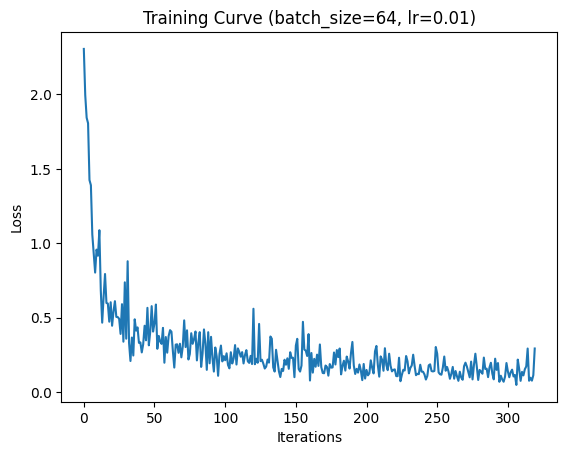

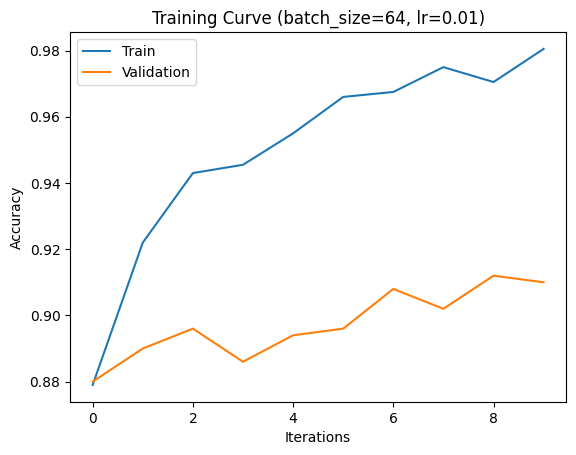

In [14]:
model = nn.Linear(28*28, 10)
run_gradient_descent(model, batch_size=64, learning_rate=0.01, weight_decay=0.01, num_epochs=10)

<font color='red'>plot model weight for each classes</font>

weight shape : (784, 10)

bias shape : (1, 10)

با ترسیم وزن ها مشاهده می شود که هر کدام از وزن های متناظر با کلاس به خوبی یادگرفته شده اند یا نه. برای مثال از کلاس صفر تا سه وزن های به زیبایی یاد گرفته شده اند اما کلاس های بعدی با وجود اینکه هاله ای یادگرفته شده است که به کلاس شبیه است به خوبی موارد اولیه نیست

torch.Size([10, 784])
torch.Size([10])


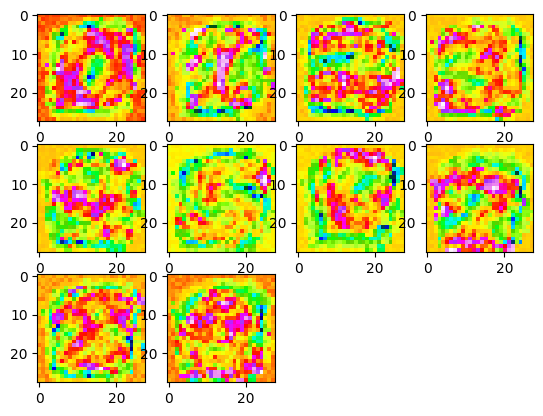

In [15]:
weight, bias = list(model.parameters())
print(weight.shape)
print(bias.shape)

# plot the first 12 images in the training data
for k in range(10):
    plt.subplot(3, 4, k+1)
    plt.imshow(weight[k, :].reshape((28, 28)).detach().numpy(), cmap='gist_ncar')

# **Q4:**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error ,mean_absolute_error
import torch
import warnings
warnings.filterwarnings('ignore')

داده ها را لود کرده و سپس فیچر جدیدی به نام فاصله تقسیم بر سرعت ایجاد می کنیم.

In [17]:
df = pd.read_csv('./ETA.csv')
df['dis_speed'] = df.distance / df.speed

# ب:

فیچر های مورد نیاز از داده ها را لود کرده و داده ها را به دو قسمت ورودی و خروحی تقسیم می کنیم. در نهایت داده ها را به دو گروه اموزش و تست تفسیم میکنیم و مدل را روی داده های اموزش اموزش داده و با داده اهی تست و اموزش ارزیابی م یکنیم

In [18]:
# 1-difine X & Y then splite train and test
# 2-defin linear regression moudel
# 3-perdict y_pred
# 4-print MSE & MAE
#############################
      #input your code
X, y = df.loc[:, ['dis_speed', 'traffic', 'weather_conditions']], df.loc[:, 'Time_Arrival']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
reg = LinearRegression().fit(X_train, y_train)
p_train = reg.predict(X_train)
p_test = reg.predict(X_test)
print(f'MSE train: {mean_squared_error(y_train, p_train)}')
print(f'MAE train: {mean_absolute_error(y_train, p_train)}')
print(f'MSE test: {mean_squared_error(y_test, p_test)}')
print(f'MAE test: {mean_absolute_error(y_test, p_test)}')
#############################


MSE train: 6.529541920214266e-30
MAE train: 2.1729146260085484e-15
MSE test: 7.010046033899326e-30
MAE test: 2.2556956302821617e-15


In [35]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
step_size = 0.006  #  for optimiser GD
epoch = 3500

First, the code defines the input features (X) and the target variable (y) from a pandas dataframe. Then, it splits the data into training and testing sets using the train_test_split() function from scikit-learn. Finally, it converts the numpy arrays to PyTorch tensors.

Next, the code defines the forward function which performs the linear regression calculation. It also defines the loss function as Mean Squared Error (MSE) using the nn.MSELoss() function from PyTorch.

The code then implements a training loop for a certain number of epochs, where it performs a forward pass, calculates the loss, and then performs a backward pass to update the weights.

After training, the code evaluates the model's performance by calculating the Mean Squared Error (MSE) and Mean Absolute Error (MAE) on the training and testing sets, respectively.

Finally, the code plots the training loss over the epochs using Matplotlib.

MSE train: 0.5005733966827393
MAE train: 0.5663033723831177
MSE test: 0.5587740540504456
MAE test: 0.6070646643638611


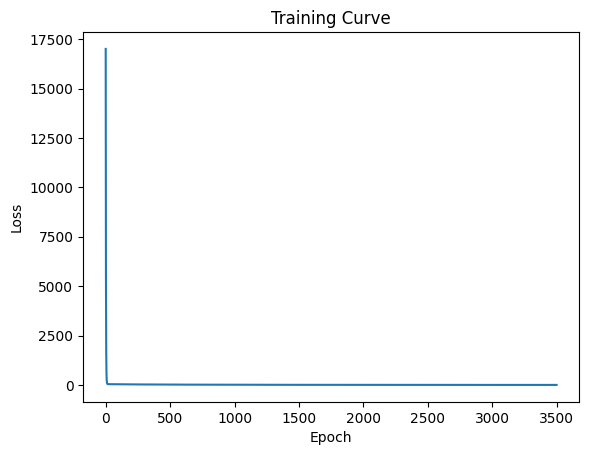

In [36]:
#1-define X & Y
X, y = df.loc[:, ['dis_speed', 'traffic', 'weather_conditions']].values, df.loc[:, 'Time_Arrival'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)



#2-define forward & loss function
def forward(x):
    linear = w0*x[:,0] + w1*x[:,1] + w2*x[:,2] + b
    return linear

loss = nn.MSELoss()

#3-write train loop
losses = []
for i in range(epoch):
    # forward pass
    y_pred = forward(X_train)
    l = loss(y_pred, y_train)
    losses.append(l.item())

    # backward pass
    l.backward()

    # update weights
    with torch.no_grad():
        w0 -= step_size * w0.grad
        w1 -= step_size * w1.grad
        w2 -= step_size * w2.grad
        b -= step_size * b.grad

        # zero the gradients after updating
        w0.grad, w1.grad, w2.grad, b.grad = None, None, None, None
        
#4-print MSE & MAE
p = forward(X_train).detach().numpy()
y = y_train.detach().numpy()
print(f'MSE train: {mean_squared_error(y, p)}')
print(f'MAE train: {mean_absolute_error(y, p)}')

#4-print MSE & MAE
p = forward(X_test).detach().numpy()
y = y_test.detach().numpy()
print(f'MSE test: {mean_squared_error(y, p)}')
print(f'MAE test: {mean_absolute_error(y, p)}')

#5-plot loss
plt.plot(range(epoch), losses)
plt.title("Training Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# ج:

In [37]:
# 1-define X & Y
X = torch.tensor(df.iloc[:, :4].values)
y = torch.tensor(df.iloc[:, 4].values)

# 1.1 defining helper functions
def forward(x):
    linear = w0*(x[:,1]/x[:,0]) + w1*x[:,2] + w2*x[:,3] + b
    return linear

loss = nn.MSELoss()
ls_w0, ls_w1, ls_w2, ls_b = [], [], [], []

for experiment in tqdm(range(100)):
      # initialize parameter
      w0 = torch.tensor(10.0, requires_grad=True)
      w1 = torch.tensor(15.0, requires_grad=True)
      w2 = torch.tensor(-10.0, requires_grad=True)
      b = torch.tensor(-20.0, requires_grad=True)
      step_size = 0.006  #  for optimiser GD
      epoch = 3500
      
      # 2-define subset of data
      rand_index = torch.randperm(2000)[:300]
      X_sub, y_sub = X[rand_index, :], y[rand_index]
      
      # 3-write train loop
      losses = []
      for i in range(epoch):
            # forward pass
            y_pred = forward(X)
            l = loss(y_pred, y)
            losses.append(l.item())

            # backward pass
            l.backward()

            # update weights
            with torch.no_grad():
                  w0 -= step_size * w0.grad
                  w1 -= step_size * w1.grad
                  w2 -= step_size * w2.grad
                  b -= step_size * b.grad

                  # zero the gradients after updating
                  w0.grad, w1.grad, w2.grad, b.grad = None, None, None, None
      
      ls_w0.append(w0.item())
      ls_w1.append(w1.item())
      ls_w2.append(w2.item())
      ls_b.append(b.item())
      

100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


In [38]:
# 4-plot & analysis w0,w1,w2,b,loss
ls_w0 = np.array(ls_w0)
w0_mean = ls_w0.mean()
w0_std = ls_w0.std()

ls_w1 = np.array(ls_w1)
w1_mean = ls_w1.mean()
w1_std = ls_w1.std()

ls_w2 = np.array(ls_w2)
w2_mean = ls_w2.mean()
w2_std = ls_w2.std()

ls_b = np.array(ls_b)
b_mean = ls_b.mean()
b_std = ls_b.std()

با توجه به پراکندگی داده ها اینجا اثر واریانس دیده نمی شود و همه داده ها روی میانگین قرار دارند.

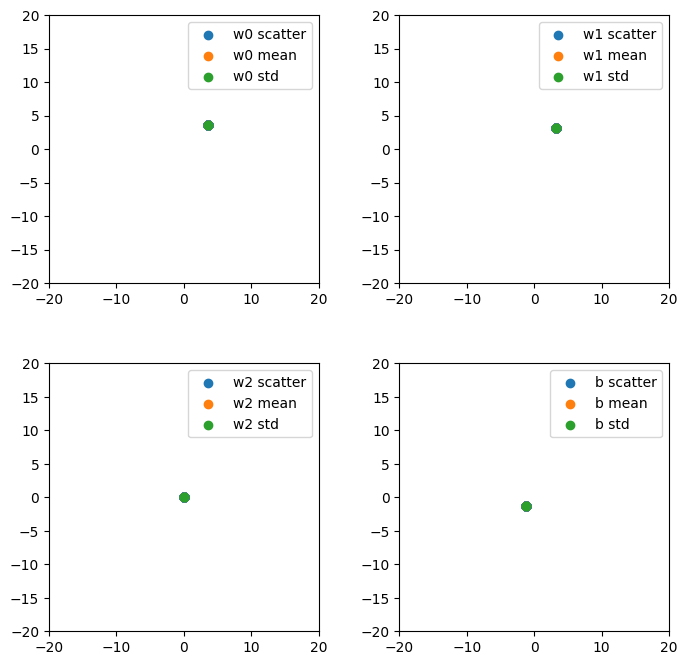

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

# First subplot
axs[0, 0].scatter(ls_w0, ls_w0, label='w0 scatter')
axs[0, 0].scatter(w0_mean, w0_mean, label='w0 mean')
axs[0, 0].scatter([w0_mean+w0_std, w0_mean-w0_std], [w0_mean+w0_std, w0_mean-w0_std], label='w0 std')
axs[0, 0].legend(loc='best')
axs[0, 0].set_xlim(-20, 20)
axs[0, 0].set_ylim(-20, 20)

# Second subplot
axs[0, 1].scatter(ls_w1, ls_w1, label='w1 scatter')
axs[0, 1].scatter(w1_mean, w1_mean, label='w1 mean')
axs[0, 1].scatter([w1_mean+w1_std, w1_mean-w1_std], [w1_mean+w1_std, w1_mean-w1_std], label='w1 std')
axs[0, 1].legend(loc='best')
axs[0, 1].set_xlim(-20, 20)
axs[0, 1].set_ylim(-20, 20)

# Third subplot
axs[1, 0].scatter(ls_w2, ls_w2, label='w2 scatter')
axs[1, 0].scatter(w2_mean, w2_mean, label='w2 mean')
axs[1, 0].scatter([w2_mean+w2_std, w2_mean-w2_std], [w2_mean+w2_std, w2_mean-w2_std], label='w2 std')
axs[1, 0].legend(loc='best')
axs[1, 0].set_xlim(-20, 20)
axs[1, 0].set_ylim(-20, 20)

# Fourth subplot
axs[1, 1].scatter(ls_b, ls_b, label='b scatter')
axs[1, 1].scatter(b_mean, b_mean, label='b mean')
axs[1, 1].scatter([b_mean+b_std, b_mean-b_std], [b_mean+b_std, b_mean-b_std], label='b std')
axs[1, 1].legend(loc='best')
axs[1, 1].set_xlim(-20, 20)
axs[1, 1].set_ylim(-20, 20)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()


# Q5

Write all the parts yourself

# ت:

I loaded the 'heart_disease.csv' dataset and preprocessed it by removing any rows with missing values. Then, I split the dataset into training and testing sets using the train_test_split() function from scikit-learn.

Next, I created a Logistic Regression model using scikit-learn's LogisticRegression() function and trained it on the training set using the fit() method.

I made predictions on both the training and testing sets using the predict() method and stored the results in variables p_train and p_test, respectively.

Finally, I printed out the confusion matrix and classification report for both the training and testing sets to evaluate the performance of the model.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('heart_disease.csv').dropna()
X, y = df.iloc[:, :15], df.iloc[:, 15]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf = LogisticRegression().fit(X_train, y_train)
p_train = clf.predict(X_train)
p_test = clf.predict(X_test)

print('TRAIN-------------')
print(confusion_matrix(y_train, p_train))
print(classification_report(y_train, p_train))
print('TEST-------------')
print(confusion_matrix(y_test, p_test))
print(classification_report(y_test, p_test))

TRAIN-------------
[[2466    9]
 [ 434   15]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2475
           1       0.62      0.03      0.06       449

    accuracy                           0.85      2924
   macro avg       0.74      0.51      0.49      2924
weighted avg       0.82      0.85      0.79      2924

TEST-------------
[[623   1]
 [106   2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       624
           1       0.67      0.02      0.04       108

    accuracy                           0.85       732
   macro avg       0.76      0.51      0.48       732
weighted avg       0.83      0.85      0.79       732



رگرسیون خطی (Linear Regression) و 
رگرسیون لجستیک (Logistic Regression)
دو الگوریتم پرکاربرد در یادگیری ماشین هستند. این دو الگوریتم به دلیل سادگی و عملکرد خوب در مسائل پیش‌بینی و طبقه‌بندی مورد استفاده قرار می‌گیرند.

رگرسیون خطی یک روش است که برای تخمین مقدار یک متغیر وابسته با استفاده از یک یا چند متغیر مستقل استفاده می‌شود. هدف این الگوریتم، پیدا کردن یک خط برای تخمین مقدار متغیر وابسته است. در این الگوریتم، خطای میانگین مربعات محاسبه می‌شود و با استفاده از الگوریتم کاهش گرادیان پارامترهای مدل بهینه شده و خط تخمین مقدار متغیر وابسته رسم می‌شود.

رگرسیون لجستیک یک روش طبقه‌بندی است که برای پیش‌بینی یک متغیر دودویی استفاده می‌شود. این الگوریتم با استفاده از تابع سیگموید، مقادیر ورودی را به احتمال بین ۰ و ۱ تبدیل می‌کند و در نهایت، یک آستانه مشخص می‌کند که برای احتمال‌های کوچکتر از آن، مقدار خروجی را ۰ و برای احتمال‌های بیشتر از آن، مقدار خروجی را ۱ می‌دهد.

در مقایسه رگرسیون خطی و رگرسیون لجستیک، رگرسیون خطی برای مسائل پیش‌بینی مقدار عددی مناسب است و رگرسیون لجستیک برای مسائل طبقه‌بندی دودویی (بله/خیر، بیمار/سالم و غیره) مفید 